In [1]:
#To  read the data import pandas
import pandas as pd

#To start with transaction dataset provided.
#Read the excelfile in this folder itself 
transaction = pd.read_excel("QVI_transaction_data.xlsx")

transaction.head(5) # few rows in transaction data.

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [2]:
transaction.shape  #Check the no.of.columns and rows

(264836, 8)

##### Column: DATE

In [3]:
#Date format correction
transaction['DATE'].head()

0    43390
1    43599
2    43605
3    43329
4    43330
Name: DATE, dtype: int64

Date is not in correct format so let us change the data type from int 64 to DATE format

In [4]:
#for date correction from int to date import following modules
import datetime
from matplotlib.dates import DateFormatter

#This function takes input as date in int format and returns date in DATE format 
def int_DateFormat(date):
    start_date = datetime.datetime(1900,1,1)
    if(date < 60):
        delta= datetime.timedelta(days=(date-1))
    else:
        delta = datetime.timedelta(days=(date-2))
    converted_date = start_date + delta
    return converted_date

In [5]:
#Apply the function to DATE column of dataset.
transaction['DATE'] = transaction['DATE'].apply(int_DateFormat)
transaction['DATE'].head()

0   2018-10-17
1   2019-05-14
2   2019-05-20
3   2018-08-17
4   2018-08-18
Name: DATE, dtype: datetime64[ns]

#### Columns: Store, LYLTY card number and Transaction id

In [6]:
#Lets us try to check the number of different store numbers in the data set
print("Stores are",transaction['STORE_NBR'].nunique())
print('Lytly card numbers are ',transaction['LYLTY_CARD_NBR'].nunique())
print("Transaction ids are ",transaction['TXN_ID'].nunique())

Stores are 272
Lytly card numbers are  72637
Transaction ids are  263127


In [7]:
#to understand each txn id is unique or not lets check
transaction['TXN_ID'].nunique()

263127

In [8]:
# as the number of txn id's are less than totalnumber of rows, we have duplicate txns.
#Lets investegate one transaction id with different rows means what

transaction[transaction['TXN_ID'].duplicated()] #the output from this code shows data with the duplicate txn_id 

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
42,2019-05-20,55,55073,48887,113,Twisties Chicken270g,1,4.6
377,2019-01-10,7,7364,7739,20,Doritos Cheese Supreme 330g,2,11.4
419,2018-10-18,12,12301,10982,93,Doritos Corn Chip Southern Chicken 150g,2,7.8
476,2018-09-08,16,16427,14546,81,Pringles Original Crisps 134g,1,3.7
511,2018-08-03,19,19272,16683,31,Infzns Crn Crnchers Tangy Gcamole 110g,2,7.6
...,...,...,...,...,...,...,...,...
264287,2018-11-25,248,248085,250293,13,Red Rock Deli Thai Chilli&Lime 150g,2,5.4
264318,2019-04-23,248,248338,250624,106,Natural ChipCo Hony Soy Chckn175g,2,6.0
264528,2018-10-03,259,259038,257645,41,Doritos Salsa Mild 300g,2,5.2
264535,2018-09-04,259,259056,257775,19,Smiths Crinkle Cut Snag&Sauce 150g,2,5.2


In [9]:
#lets investigate any one say for TXN ID 48887
transaction[transaction['TXN_ID'] == 48887] #transactions with 48887 txn_id

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
41,2019-05-20,55,55073,48887,4,Dorito Corn Chp Supreme 380g,1,3.25
42,2019-05-20,55,55073,48887,113,Twisties Chicken270g,1,4.60


##### Observations:
##### 1.The customer with a LYLTY card nmber
##### 2.When the customer arrives in the shop for more than onvce, he willhave same LYLTY card number but different ttxn_id.
##### 3.Hence this is the customer with same LYLTY_Card_number and same transaction _ID but has purchased different products

In [10]:
print("Product number are",transaction['PROD_NBR'].nunique())
print("Product Names are",transaction['PROD_NAME'].nunique())
#transaction['PROD_NAME'].unique() #big list need to handel differently

Product number are 114
Product Names are 114


In [11]:
#We can extract a data of weights from the prod name column including the product brand.
transaction['PACK_SIZE'] = transaction['PROD_NAME'].str.extract("(\d+)")
type(transaction['PACK_SIZE'][0]) 

str

In [12]:
#Conert the string data type to int
transaction['PACK_SIZE'] = pd.to_numeric(transaction['PACK_SIZE'])
type(transaction['PACK_SIZE'][0])

numpy.int64

##### Column: PROD_NAME

In [13]:
#We will remove them from names column and now note that product name also has special characters lets remove them also
import re
def clean_text(text):
    text = re.sub('[&/]',".",text) #removes ""&"" and "/" and replaces it with .
    text = re.sub('\d\w*',".",text) #removes product weight and replaces it with .
    return text

#Apply the function to product name 
transaction['PROD_NAME'] = transaction['PROD_NAME'].apply(clean_text)

In [14]:
transaction['PROD_NAME']

0           Natural Chip        Compny SeaSalt.
1                         CCs Nacho Cheese    .
2           Smiths Crinkle Cut  Chips Chicken .
3           Smiths Chip Thinly  S.Cream.Onion .
4         Kettle Tortilla ChpsHny.Jlpno Chili .
                          ...                  
264831     Kettle Sweet Chilli And Sour Cream .
264832               Tostitos Splash Of  Lime .
264833                    Doritos Mexicana    .
264834     Doritos Corn Chip Mexican Jalapeno .
264835               Tostitos Splash Of  Lime .
Name: PROD_NAME, Length: 264836, dtype: object

In [15]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist as fdist

# Created the large string with words used in the whole column separated by a spsace.
clean_prod_name = transaction['PROD_NAME']
string =''.join(clean_prod_name)
prod_name = word_tokenize(string)
prod_name[0:10]

[nltk_data] Downloading package punkt to C:\Users\Pranita R.
[nltk_data]     Shinde\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['Natural',
 'Chip',
 'Compny',
 'SeaSalt.CCs',
 'Nacho',
 'Cheese',
 '.Smiths',
 'Crinkle',
 'Cut',
 'Chips']

In [16]:
#Fdist function calculate the frequence of each token and keeps in dattaframe.
word_freq = fdist(prod_name)
freq_df = pd.DataFrame(list(word_freq.items()),columns= ['word','frequency']).sort_values(by = 'frequency',ascending=False)
freq_df

,word,frequency
9,Chips,49770
25,.,43517
13,.Kettle,38851
5,Cheese,27890
6,.Smiths,26969
...,...,...
355,Chckn.Burger,8
298,Chicken.NCC,8
421,Ht.Sunbites,8
423,SaltSunbites,5


In [17]:
transaction['PROD_NAME'] = transaction['PROD_NAME'].apply(lambda x: x.lower())
transaction = transaction[~transaction['PROD_NAME'].str.contains('salsa')]
transaction['PROD_NAME']=transaction['PROD_NAME'].apply(lambda x: x.title())
transaction.head(5)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny Seasalt.,2,6.0,175
1,2019-05-14,1,1307,348,66,Ccs Nacho Cheese .,3,6.3,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken .,2,2.9,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S.Cream.Onion .,5,15.0,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla Chpshny.Jlpno Chili .,3,13.8,150


##### Column : Prod_Qty

In [18]:
# now move towards prod_QTY
transaction['PROD_QTY'].value_counts()

2      220070
1       25476
5         415
3         408
4         371
200         2
Name: PROD_QTY, dtype: int64

200 is unusual  which has only 2 instances.

In [19]:
transaction[transaction['PROD_QTY']==200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme .,200,650.0,380
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme .,200,650.0,380


This is done by one customer who has taken 200 qty of a quality of chips on two different days

In [20]:
# which is not usual so drop this customer
transaction.drop(transaction.index[transaction['LYLTY_CARD_NBR']==226000],inplace = True)

#### Column total Sales

In [21]:
#in case of total sales
transaction['TOT_SALES'].min(),transaction['TOT_SALES'].mean(), transaction['TOT_SALES'].max()

(1.7, 7.316112912377528, 29.5)

In [22]:
transaction['TOT_SALES'].value_counts()

9.2     22821
7.4     22513
6.0     20796
7.6     20212
8.8     19900
        ...  
15.5        3
9.3         3
6.9         3
12.4        2
11.2        2
Name: TOT_SALES, Length: 104, dtype: int64

looks fine.

### Transaction Date deep drive

In [23]:
transaction['DATE'].nunique()

364

In [24]:
transaction['DATE'].min(),transaction['DATE'].max()

(Timestamp('2018-07-01 00:00:00'), Timestamp('2019-06-30 00:00:00'))

In [25]:
pd.date_range(start = '2018-07-01',end = '2019-06-30').difference(transaction['DATE'])

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq=None)

Create df for sales date wise

In [26]:
data = pd.pivot_table(transaction, index = 'DATE',values = 'TOT_SALES',aggfunc = 'sum')
data
data_zero_sales = pd.DataFrame(index = pd.date_range(start= '2018-07-01',end = '2019-06-30'))
data_zero_sales['TOT_SALES']=0
data_zero_sales


,TOT_SALES
2018-07-01,0
2018-07-02,0
2018-07-03,0
2018-07-04,0
2018-07-05,0
...,...
2019-06-26,0
2019-06-27,0
2019-06-28,0
2019-06-29,0


In [27]:
data_tot_sales = data + data_zero_sales
data_tot_sales.fillna(0,inplace = True)
data_tot_sales

,TOT_SALES
2018-07-01,4920.1
2018-07-02,4877.0
2018-07-03,4954.7
2018-07-04,4968.1
2018-07-05,4682.0
...,...
2019-06-26,4829.7
2019-06-27,4941.3
2019-06-28,4876.6
2019-06-29,5177.6


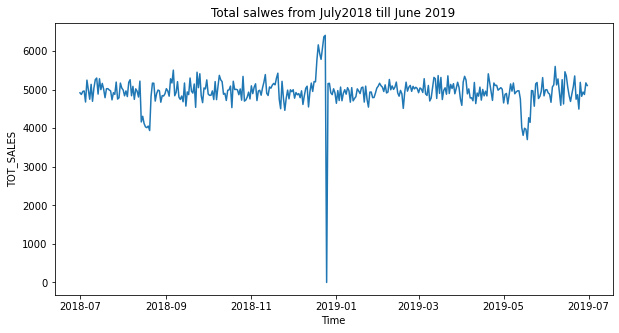

In [28]:
# ploting time line for sales
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
timeline = data_tot_sales.index
graph = data_tot_sales['TOT_SALES']

fig,ax = plt.subplots(figsize = (10,5))
ax.plot(timeline,graph)
plt.title("Total salwes from July2018 till June 2019")
plt.xlabel('Time')
plt.ylabel('TOT_SALES')

plt.show()

In [29]:
#this confirms our there is zero sales on 25th December as its chrimtmas day.

#### Column:Pack size

In [30]:
transaction['PACK_SIZE']
transaction["PACK_SIZE"].unique()

array([175, 170, 150, 330, 210, 270, 220, 125, 110, 134, 380, 180, 165,
       135, 250, 200, 160, 190,  90,  70], dtype=int64)

<AxesSubplot:>

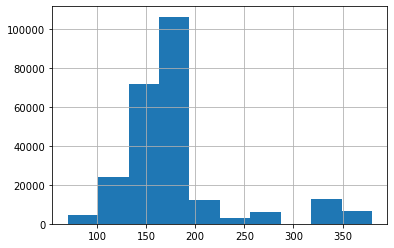

In [31]:
#to checkdistribution of pack size and plotthehist
transaction['PACK_SIZE'].hist()


In [32]:
transaction.columns #Recall the column names

Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES', 'PACK_SIZE'],
      dtype='object')

In [33]:
partition = transaction['PROD_NAME'].str.partition() #Make the partition of the string
transaction['BRAND'] = partition[0] #0th index is the produc's brand name.
transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND
0,2018-10-17,1,1000,1,5,Natural Chip Compny Seasalt.,2,6.0,175,Natural
1,2019-05-14,1,1307,348,66,Ccs Nacho Cheese .,3,6.3,175,Ccs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken .,2,2.9,170,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S.Cream.Onion .,5,15.0,175,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla Chpshny.Jlpno Chili .,3,13.8,150,Kettle


In [34]:
transaction['BRAND'].unique()

array(['Natural', 'Ccs', 'Smiths', 'Kettle', 'Grain', 'Doritos',
       'Twisties', 'Ww', 'Thins', 'Burger', 'Ncc', 'Cheezels', 'Infzns',
       'Red', 'Pringles', 'Dorito', 'Infuzions', 'Smith', 'Grnwves',
       'Tyrrells', 'Cobs', 'French', 'Rrd', 'Tostitos', 'Cheetos',
       'Woolworths', 'Snbts', 'Sunbites'], dtype=object)

In [35]:
#Remove the duplicates inn the data fromchips brand names.
transaction["BRAND"].replace('Ncc','Natural',inplace = True) # replaces 'Ncc' to 'Natural'
transaction['BRAND'].replace("Ccs","CCS",inplace = True) #replaces "Ccs" to "CCS"
transaction['BRAND'].replace(["Grain","Grnwves"],'Grainwaves',inplace =True)
transaction['BRAND'].replace("Ww",'Woolworths',inplace = True)
transaction['BRAND'].replace('Infzns','Infuzions',inplace =True)
transaction['BRAND'].replace('Red','Rrd',inplace =True)
transaction['BRAND'].replace('Snbts','Sunbites',inplace = True)
transaction['BRAND'].replace('Smith','Smiths',inplace = True)
transaction['BRAND'].replace('Dorito','Doritos',inplace = True)
transaction["BRAND"].unique() #Lets check now.

array(['Natural', 'CCS', 'Smiths', 'Kettle', 'Grainwaves', 'Doritos',
       'Twisties', 'Woolworths', 'Thins', 'Burger', 'Cheezels',
       'Infuzions', 'Rrd', 'Pringles', 'Tyrrells', 'Cobs', 'French',
       'Tostitos', 'Cheetos', 'Sunbites'], dtype=object)

In [36]:
#sales from  eachh brand
transaction.groupby('BRAND').TOT_SALES.sum().sort_values(ascending = False)

BRAND
Kettle        390239.8
Doritos       226329.9
Smiths        217492.0
Pringles      177655.5
Infuzions      99047.6
Thins          88852.5
Rrd            87607.5
Twisties       81522.1
Tostitos       79789.6
Cobs           70569.8
Tyrrells       51647.4
Grainwaves     51617.2
Natural        42318.0
Woolworths     41059.1
Cheezels       40029.9
CCS            18078.9
Cheetos        16884.5
Sunbites        9676.4
French          7929.0
Burger          6831.0
Name: TOT_SALES, dtype: float64

# CUSTOMER DATA


In [37]:
customer = pd.read_csv('QVI_purchase_behaviour.csv')
customer.columns

Index(['LYLTY_CARD_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER'], dtype='object')

#### Column : LYLTY CARDNBR

In [38]:
transaction['LYLTY_CARD_NBR'].nunique()

71287

In [39]:
customer['LYLTY_CARD_NBR'].nunique(),len(customer)

(72637, 72637)

In [40]:
customer.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


#### Column: LIFESTAGES

In [41]:
customer['LIFESTAGE'].unique()

array(['YOUNG SINGLES/COUPLES', 'YOUNG FAMILIES', 'OLDER SINGLES/COUPLES',
       'MIDAGE SINGLES/COUPLES', 'NEW FAMILIES', 'OLDER FAMILIES',
       'RETIREES'], dtype=object)

In [42]:
customer['LIFESTAGE'].value_counts().sort_values(ascending = False)

RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: LIFESTAGE, dtype: int64

<AxesSubplot:xlabel='count', ylabel='LIFESTAGE'>

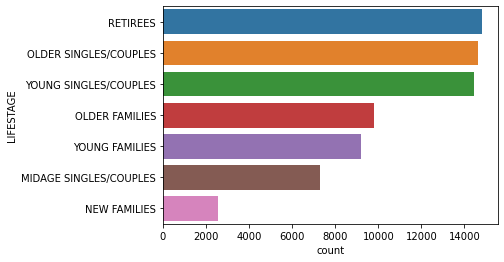

In [43]:
#To see above numbers in plotted format
sns.countplot(y = customer['LIFESTAGE'],order=customer['LIFESTAGE'].value_counts().index)

#### Cloumn: PREMIUN CUSTOMERS

In [44]:
customer['PREMIUM_CUSTOMER'].value_counts().sort_values(ascending = False)

Mainstream    29245
Budget        24470
Premium       18922
Name: PREMIUM_CUSTOMER, dtype: int64

In [45]:
#Combine data sets togetheer
customer.shape,transaction.shape

((72637, 3), (246740, 10))

In [46]:
CombineData = pd.merge(transaction,customer)
CombineData.shape #LYLTY card number is sme for both he column

(246740, 12)

In [47]:
CombineData.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny Seasalt.,2,6.0,175,Natural,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,Ccs Nacho Cheese .,3,6.3,175,CCS,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-10,1,1307,346,96,Ww Original Stacked Chips .,2,3.8,160,Woolworths,MIDAGE SINGLES/COUPLES,Budget
3,2019-03-09,1,1307,347,54,Ccs Original .,1,2.1,175,CCS,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken .,2,2.9,170,Smiths,MIDAGE SINGLES/COUPLES,Budget


In [48]:
#check for null values
CombineData.isnull().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
PACK_SIZE           0
BRAND               0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

analyse combine data come out with insights about purschasing behaviour 

In [49]:
sales = CombineData.groupby(['PREMIUM_CUSTOMER','LIFESTAGE']).TOT_SALES.sum()
sales.sort_values(ascending = False)

PREMIUM_CUSTOMER  LIFESTAGE             
Budget            OLDER FAMILIES            156863.75
Mainstream        YOUNG SINGLES/COUPLES     147582.20
                  RETIREES                  145168.95
Budget            YOUNG FAMILIES            129717.95
                  OLDER SINGLES/COUPLES     127833.60
Mainstream        OLDER SINGLES/COUPLES     124648.50
Premium           OLDER SINGLES/COUPLES     123537.55
Budget            RETIREES                  105916.30
Mainstream        OLDER FAMILIES             96413.55
Premium           RETIREES                   91296.65
Mainstream        YOUNG FAMILIES             86338.25
                  MIDAGE SINGLES/COUPLES     84734.25
Premium           YOUNG FAMILIES             78571.70
                  OLDER FAMILIES             75242.60
Budget            YOUNG SINGLES/COUPLES      57122.10
Premium           MIDAGE SINGLES/COUPLES     54443.85
                  YOUNG SINGLES/COUPLES      39052.30
Budget            MIDAGE SINGLES/COUPLES 

<AxesSubplot:title={'center':'Total_Sales_Lifestage wise'}, xlabel='LIFESTAGE'>

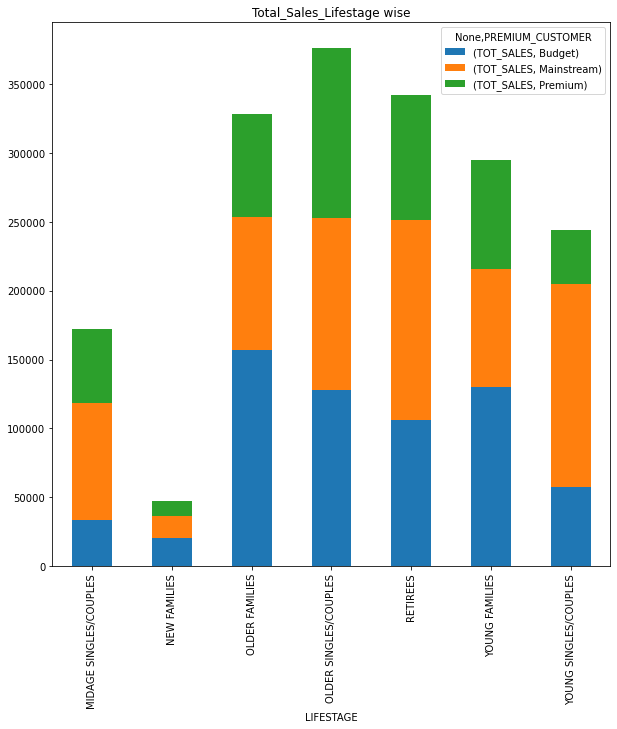

In [50]:
# to get visualization
df = pd.DataFrame(CombineData.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).TOT_SALES.sum())
df.unstack().plot(kind ='bar',stacked = True, figsize = (10,10),title = "Total_Sales_Lifestage wise")

OLder singles/Coupleas and Retierres have more sales 

In [51]:
# this did not tell the whole story, segment with more customers will be most used segment.
#Total sales is rate*volume
no_of_cust = pd.DataFrame(CombineData.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).LYLTY_CARD_NBR.nunique())
no_of_cust.sort_values(by = 'LYLTY_CARD_NBR',ascending = False)

LYLTY_CARD_NBR
LIFESTAGE              PREMIUM_CUSTOMER                
YOUNG SINGLES/COUPLES  Mainstream                  7917
RETIREES               Mainstream                  6358
OLDER SINGLES/COUPLES  Mainstream                  4858
                       Budget                      4849
                       Premium                     4682
OLDER FAMILIES         Budget                      4611
RETIREES               Budget                      4385
YOUNG FAMILIES         Budget                      3953
RETIREES               Premium                     3812
YOUNG SINGLES/COUPLES  Budget                      3647
MIDAGE SINGLES/COUPLES Mainstream                  3298
OLDER FAMILIES         Mainstream                  2788
YOUNG FAMILIES         Mainstream                  2685
YOUNG SINGLES/COUPLES  Premium                     2480
YOUNG FAMILIES         Premium                     2398
MIDAGE SINGLES/COUPLES Premium                     2369
OLDER FAMILIES         Premium                     2231
MIDAGE SINGLES/COUPLES Budget                      1474
NEW FAMILIES           Budget                      1087
                       Mainstream                   830
                       Premium                      575

still now we have arrived at Mainstream, young singles/couples have higher customers,
but this is not the case in Budgdet retieres.
The reason for that is retieres buy more expensive chips or they buy more chips.

In [52]:
# to investigate that lets ifnd the average number of chis brought by each segment of customer
avg_units_per_cust = CombineData.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).PROD_QTY.sum()/CombineData.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).LYLTY_CARD_NBR.nunique()
avg_units_per_cust = pd.DataFrame(avg_units_per_cust,columns = {'Average unit per cust'})

avg_units_per_cust.sort_values(by = 'Average unit per cust',ascending = False)

Average unit per cust
LIFESTAGE              PREMIUM_CUSTOMER                       
OLDER FAMILIES         Mainstream                     9.255380
                       Budget                         9.076773
                       Premium                        9.071717
YOUNG FAMILIES         Budget                         8.722995
                       Premium                        8.716013
                       Mainstream                     8.638361
OLDER SINGLES/COUPLES  Budget                         6.781398
                       Premium                        6.769543
                       Mainstream                     6.712021
MIDAGE SINGLES/COUPLES Mainstream                     6.432080
RETIREES               Budget                         6.141847
                       Premium                        6.103358
MIDAGE SINGLES/COUPLES Premium                        6.078514
                       Budget                         6.026459
RETIREES               Mainstream                     5.925920
NEW FAMILIES           Mainstream                     4.891566
                       Budget                         4.821527
                       Premium                        4.815652
YOUNG SINGLES/COUPLES  Mainstream                     4.575597
                       Premium                        4.264113
                       Budget                         4.250069

<AxesSubplot:title={'center':'No.of.Avg units per customer'}, xlabel='LIFESTAGE'>

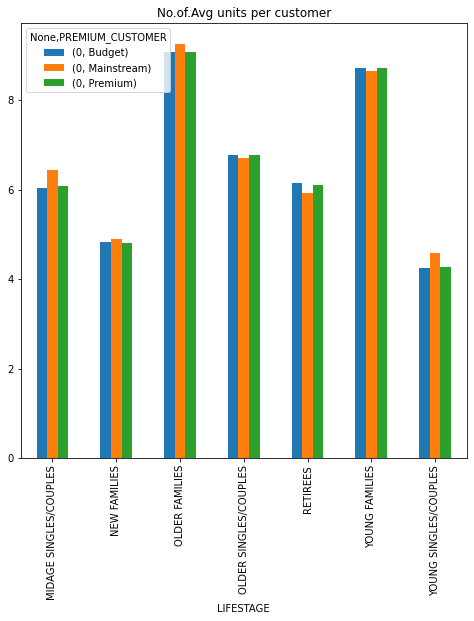

In [53]:
AvgUnitsPlot = pd.DataFrame(CombineData.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).PROD_QTY.sum()/CombineData.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).LYLTY_CARD_NBR.nunique())
AvgUnitsPlot.unstack().plot(kind = 'bar',figsize =(8,8),title = "No.of.Avg units per customer")

older families and young families are purchasing more chips

In [54]:
# to investigate that lets ifnd the average price brought by each segment of customer
avg_price = CombineData.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).TOT_SALES.sum()/CombineData.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).PROD_QTY.sum()
avg_price = pd.DataFrame(avg_price,columns = {'Average price'})
avg_price.sort_values(by = 'Average price',ascending = False)

Average price
LIFESTAGE              PREMIUM_CUSTOMER               
YOUNG SINGLES/COUPLES  Mainstream             4.074043
MIDAGE SINGLES/COUPLES Mainstream             3.994449
NEW FAMILIES           Mainstream             3.935887
RETIREES               Budget                 3.932731
NEW FAMILIES           Budget                 3.931969
RETIREES               Premium                3.924037
OLDER SINGLES/COUPLES  Premium                3.897698
                       Budget                 3.887529
NEW FAMILIES           Premium                3.886168
RETIREES               Mainstream             3.852986
OLDER SINGLES/COUPLES  Mainstream             3.822753
MIDAGE SINGLES/COUPLES Premium                3.780823
YOUNG FAMILIES         Budget                 3.761903
                       Premium                3.759232
MIDAGE SINGLES/COUPLES Budget                 3.753878
OLDER FAMILIES         Budget                 3.747969
                       Mainstream             3.736380
YOUNG FAMILIES         Mainstream             3.722439
OLDER FAMILIES         Premium                3.717703
YOUNG SINGLES/COUPLES  Premium                3.692889
                       Budget                 3.685297

<AxesSubplot:title={'center':'Average price'}, xlabel='LIFESTAGE'>

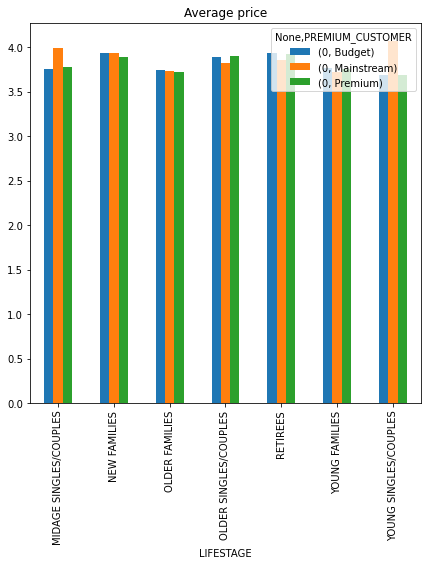

In [55]:
AvgPricePlot = pd.DataFrame(CombineData.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).TOT_SALES.sum()/CombineData.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).PROD_QTY.sum())
AvgPricePlot.unstack().plot(kind = 'bar',figsize =(7,7),title = "Average price")

Midage single/couples and young singlesand couplesspend more on high priced chips

In [56]:
# Perform an independent t-test between mainstream vs non-mainstream midage 
#and young singles/couples to test this difference

# Create a new dataframe pricePerUnit
pricePerUnit = CombineData

# Create a new column under pricePerUnit called PRICE
pricePerUnit['PRICE'] = pricePerUnit['TOT_SALES'] / pricePerUnit['PROD_QTY']

# Let's have a look
pricePerUnit.head()


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,PRICE
0,2018-10-17,1,1000,1,5,Natural Chip Compny Seasalt.,2,6.0,175,Natural,YOUNG SINGLES/COUPLES,Premium,3.00
1,2019-05-14,1,1307,348,66,Ccs Nacho Cheese .,3,6.3,175,CCS,MIDAGE SINGLES/COUPLES,Budget,2.10
2,2018-11-10,1,1307,346,96,Ww Original Stacked Chips .,2,3.8,160,Woolworths,MIDAGE SINGLES/COUPLES,Budget,1.90
3,2019-03-09,1,1307,347,54,Ccs Original .,1,2.1,175,CCS,MIDAGE SINGLES/COUPLES,Budget,2.10
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken .,2,2.9,170,Smiths,MIDAGE SINGLES/COUPLES,Budget,1.45


Text(0.5, 0, 'Price per Unit')

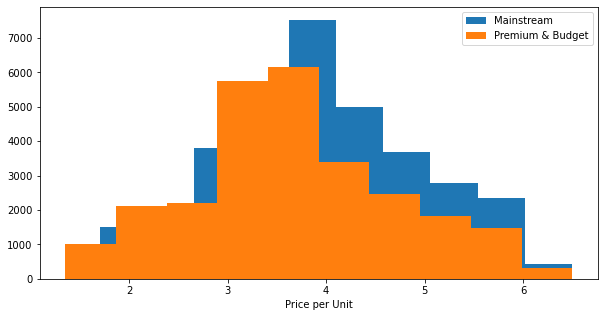

In [57]:
# Let's group our data into mainstream and non-mainstream

mainstream = pricePerUnit.loc[(pricePerUnit['PREMIUM_CUSTOMER'] == 'Mainstream') & ( (pricePerUnit['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') | (pricePerUnit['LIFESTAGE'] == 'MIDAGE SINGLES/COUPLES') ), 'PRICE']
nonMainstream = pricePerUnit.loc[(pricePerUnit['PREMIUM_CUSTOMER'] != 'Mainstream') & ( (pricePerUnit['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') | (pricePerUnit['LIFESTAGE'] == 'MIDAGE SINGLES/COUPLES') ), 'PRICE']
# Compare histograms of mainstream and non-mainstream customers

plt.figure(figsize = (10, 5))
plt.hist(mainstream, label = 'Mainstream')
plt.hist(nonMainstream, label = 'Premium & Budget')
plt.legend()
plt.xlabel('Price per Unit')

 MAinstream customers have highermean than that of non mainstream.

In [58]:
import numpy as np
print("Mainstream average price per unit: ${:.2f}".format(np.mean(mainstream))) #2f takes 2 digits from decimal point
print("Non-mainstream average price per unit: ${:.2f}".format(np.mean(nonMainstream)))
if np.mean(mainstream) > np.mean(nonMainstream):
    print("Mainstream customers have higher average price per unit. ")
else:
    print("Non-mainstream customers have a higher average price per unit. ")


Mainstream average price per unit: $4.04
Non-mainstream average price per unit: $3.71
Mainstream customers have higher average price per unit. 


In [59]:
# Perform t-test 
from scipy.stats import ttest_ind
ttest_ind(mainstream, nonMainstream)

Ttest_indResult(statistic=37.83196107667825, pvalue=2.235645611540966e-309)

Now let us investigate which brand of chips do they buy.

In [60]:
target = CombineData.loc[(CombineData['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') & (CombineData['PREMIUM_CUSTOMER'] == 'Mainstream'), :]
nonTarget = CombineData.loc[(CombineData['LIFESTAGE'] != 'YOUNG SINGLES/COUPLES' ) & (CombineData['PREMIUM_CUSTOMER'] != 'Mainstream'), :]
target.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,PRICE
221345,2018-08-16,1,1020,26,19,Smiths Crinkle Cut Snag.Sauce .,1,2.6,150,Smiths,YOUNG SINGLES/COUPLES,Mainstream,2.6
221346,2018-10-02,1,1020,27,7,Smiths Crinkle Original .,1,5.7,330,Smiths,YOUNG SINGLES/COUPLES,Mainstream,5.7
221347,2019-05-02,1,1020,28,84,Grnwves Plus Btroot . Chilli Jam .,1,3.1,180,Grainwaves,YOUNG SINGLES/COUPLES,Mainstream,3.1
221348,2018-08-17,1,1163,188,46,Kettle Original .,1,5.4,175,Kettle,YOUNG SINGLES/COUPLES,Mainstream,5.4
221349,2019-02-07,1,1163,189,12,Natural Chip Co Tmato Hrb.Spce .,1,3.0,175,Natural,YOUNG SINGLES/COUPLES,Mainstream,3.0


In [61]:
#Affinity to brand : Affinity is more tendency towards which brand

In [62]:
#Targeted
targetBrand=target.loc[:,["BRAND","PROD_QTY"]]
targetSum = targetBrand['PROD_QTY'].sum()
targetBrand['Target Brand Affinity'] = targetBrand['PROD_QTY']/targetSum
targetBrand = pd.DataFrame(targetBrand.groupby('BRAND')['Target Brand Affinity'].sum())

#Non target
nontargetBrand = nonTarget.loc[:,["BRAND","PROD_QTY"]]
nontargetSum = nontargetBrand['PROD_QTY'].sum()
nontargetBrand['Non Target Brand Affinity'] = nontargetBrand['PROD_QTY']/nontargetSum
NontargetBrand = pd.DataFrame(nontargetBrand.groupby('BRAND')['Non Target Brand Affinity'].sum())

In [63]:
#Merge target and non target datasets
brand_proportions = pd.merge(targetBrand,NontargetBrand,left_index =True,right_index =True)
brand_proportions

,Target Brand Affinity,Non Target Brand Affinity
BRAND,,
Burger,0.002926,0.006538
CCS,0.011180,0.018445
Cheetos,0.008033,0.011759
Cheezels,0.017971,0.018904
Cobs,0.044638,0.038449
Doritos,0.122761,0.101171
French,0.003948,0.005707
Grainwaves,0.032712,0.031069
Infuzions,0.064679,0.057410


In [64]:
brand_proportions['Affitnity_to_brand'] = brand_proportions['Target Brand Affinity'] / brand_proportions['Non Target Brand Affinity']
brand_proportions.sort_values(by = 'Affitnity_to_brand', ascending = False)

,Target Brand Affinity,Non Target Brand Affinity,Affitnity_to_brand
BRAND,,,
Tyrrells,0.031553,0.025715,1.227025
Twisties,0.046184,0.037933,1.217506
Doritos,0.122761,0.101171,1.213397
Kettle,0.197985,0.166560,1.188667
Tostitos,0.045411,0.038350,1.184100
Pringles,0.119420,0.101110,1.181090
Cobs,0.044638,0.038449,1.160959
Infuzions,0.064679,0.057410,1.126622
Thins,0.060373,0.057159,1.056217


In [65]:
#Affinity to pack size

In [66]:
targetSize = target.loc[:,["PACK_SIZE","PROD_QTY"]]
targetSum = targetSize["PROD_QTY"].sum()
targetSize['Target Size Affinity'] = targetSize["PROD_QTY"]/targetSum
targetSize = pd.DataFrame(targetSize.groupby('PACK_SIZE')['Target Size Affinity'].sum())

#Non target
nontargetSize = nonTarget.loc[:,["PACK_SIZE","PROD_QTY"]]
nontargetSum = nontargetSize["PROD_QTY"].sum()
nontargetSize['Non Target Size Affinity'] = nontargetSize["PROD_QTY"]/nontargetSum
NontargetSize= pd.DataFrame(nontargetSize.groupby('PACK_SIZE')['Non Target Size Affinity'].sum())

In [67]:
#Merge target and non target datasets
Size_proportions = pd.merge(targetSize,NontargetSize,left_index =True,right_index =True)
Size_proportions.head()

,Target Size Affinity,Non Target Size Affinity
PACK_SIZE,,
70,0.003037,0.006284
90,0.006349,0.012613
110,0.106280,0.089575
125,0.003009,0.005976
134,0.119420,0.101110


In [68]:
Size_proportions['Affitnity_to_Size'] = Size_proportions['Target Size Affinity'] / Size_proportions['Non Target Size Affinity']
Size_proportions.sort_values(by = 'Affitnity_to_Size', ascending = False)


,Target Size Affinity,Non Target Size Affinity,Affitnity_to_Size
PACK_SIZE,,,
270,0.031829,0.025070,1.269608
380,0.032160,0.025711,1.250827
330,0.061284,0.050974,1.202243
110,0.106280,0.089575,1.186492
134,0.119420,0.101110,1.181090
210,0.029124,0.024891,1.170020
135,0.014769,0.012931,1.142086
250,0.014355,0.012863,1.115959
170,0.080773,0.080347,1.005300


In [69]:
# Which brand offers 270g pack size?

CombineData.loc[CombineData['PACK_SIZE'] == 270, :].head(10)


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,PRICE
34,2019-05-18,9,9208,8634,15,Twisties Cheese .,2,9.2,270,Twisties,MIDAGE SINGLES/COUPLES,Budget,4.6
79,2018-08-24,39,39167,35639,113,Twisties Chicken.,2,9.2,270,Twisties,MIDAGE SINGLES/COUPLES,Budget,4.6
125,2019-05-06,54,54305,48304,15,Twisties Cheese .,2,9.2,270,Twisties,MIDAGE SINGLES/COUPLES,Budget,4.6
132,2019-05-20,55,55073,48887,113,Twisties Chicken.,1,4.6,270,Twisties,MIDAGE SINGLES/COUPLES,Budget,4.6
209,2019-01-01,80,80182,78980,15,Twisties Cheese .,2,9.2,270,Twisties,MIDAGE SINGLES/COUPLES,Budget,4.6
252,2018-11-18,84,84096,83672,113,Twisties Chicken.,2,9.2,270,Twisties,MIDAGE SINGLES/COUPLES,Budget,4.6
253,2019-05-20,88,88320,87811,113,Twisties Chicken.,2,9.2,270,Twisties,MIDAGE SINGLES/COUPLES,Budget,4.6
278,2018-07-11,102,102115,102207,15,Twisties Cheese .,2,9.2,270,Twisties,MIDAGE SINGLES/COUPLES,Budget,4.6
347,2019-04-05,118,118007,120735,113,Twisties Chicken.,2,9.2,270,Twisties,MIDAGE SINGLES/COUPLES,Budget,4.6
350,2018-07-01,119,119051,122360,113,Twisties Chicken.,2,9.2,270,Twisties,MIDAGE SINGLES/COUPLES,Budget,4.6


In [70]:
# Is Twisties the only brand who sells 270g pack size?

CombineData.loc[CombineData['PACK_SIZE'] == 270, 'BRAND'].unique()


array(['Twisties'], dtype=object)

# It is clear that Twisties is the Brand and Pack size is 270g which is more prefered.